# DLC Postprocess Library

Run after training has been performed, and at least 1 video has been analyzed

In [1]:
import os
import numpy as np

from IPython.display import display, HTML

# Append base directory
import os,sys,inspect
thispath = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parpath = os.path.dirname(thispath)
sys.path.append(parpath)
print("Appended script directory", parpath)

%load_ext autoreload
%autoreload 2

from lib.qt_wrapper import gui_fname, gui_fnames, gui_fpath
from lib.parse_dlc_results import dlc_csv_composite_crawl, dlc_fix_old_h5
# from lib.plots import plotStatistics
from lib.plots_multitrial import SessionPostprocess

Appended script directory /media/aleksejs/DataHDD/work/codes/comp-neuro/analysis-tracking/dlc-scripts/scripts


/opt/anaconda3/envs/py36qt5/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Merge trial-based DLC results into session-based

1. Provide root directory for videos and tracking
2. Provide output folder
3. Merged files will be written into output folder (with no further subfolder structure)
  * Name of an output file will be the folder name the trials are contained in
  * Code will throw an exception (crash) if
    - number of videos and tracking files does not match
    - framerate changes during the session
    - tracked nodes do not have exact same names during the session

In [2]:
root_crawl_path = gui_fpath("Select path for crawler", "./")
output_path = gui_fpath("Select output path", root_crawl_path)

In [ ]:
dlc_csv_composite_crawl(root_crawl_path, output_path, extrakeys=[])

# Old Version of dlc-scripts only: Remove useless directories

In [6]:
fnames_h5 = gui_fnames("h5", "./", "HDF5 (*.h5)")
dlc_fix_old_h5(fnames_h5)

0 / 221- already converted, skip
1 / 221- already converted, skip
2 / 221- already converted, skip
3 / 221- already converted, skip
4 / 221- already converted, skip
5 / 221- already converted, skip
6 / 221- already converted, skip
7 / 221- already converted, skip
8 / 221- already converted, skip
9 / 221- already converted, skip
10 / 221- already converted, skip
11 / 221- already converted, skip
12 / 221- already converted, skip
13 / 221- already converted, skip
14 / 221- already converted, skip
15 / 221- already converted, skip
16 / 221- already converted, skip
17 / 221- already converted, skip
18 / 221- already converted, skip
19 / 221- already converted, skip
20 / 221- already converted, skip
21 / 221- already converted, skip
22 / 221- already converted, skip
23 / 221- already converted, skip
24 / 221- already converted, skip
25 / 221- already converted, skip
26 / 221- already converted, skip
27 / 221- already converted, skip
28 / 221- already converted, skip
29 / 221- already conver

# Analyse a session-based DLC results file

In [17]:
fnameH5 = gui_fname("Open DLC session results file", "./", "HDF5 files (*.h5)")
fpathVideo = gui_fpath("Open video containing folder", fnameH5)
fnameTemplate = gui_fname("Select Postprocess Template Filename...", "./", "Template Files (*.json)")
fpathResult = gui_fpath("Select result path", "./")

In [18]:
SP = SessionPostprocess(fnameH5, fnameTemplate, fpathVideo, fpathResult)

### Some basic data about the data set

Original path /media/hpc_user/MyBook6/whisk_video/mvg_4/mvg_4_2017_12_18_a


,yaro_dlc_results
Framerate,40.0
Maximal number of time steps,408.0
Number of tracked nodes,9.0
Number of trials,472.0


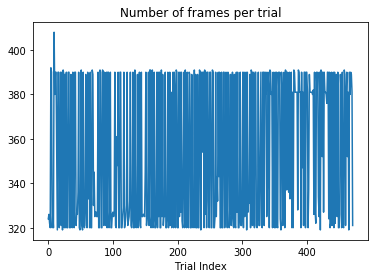

In [19]:
SP.display_trial_properties()

### Quality control

Plots p-values of each coordinate as projections over time, trial and channel

**TODO**:
<font color='red' size='3'>
 <ul>
  <li>Integrate velocity and edge length criteria</li>
</ul> 
</font>

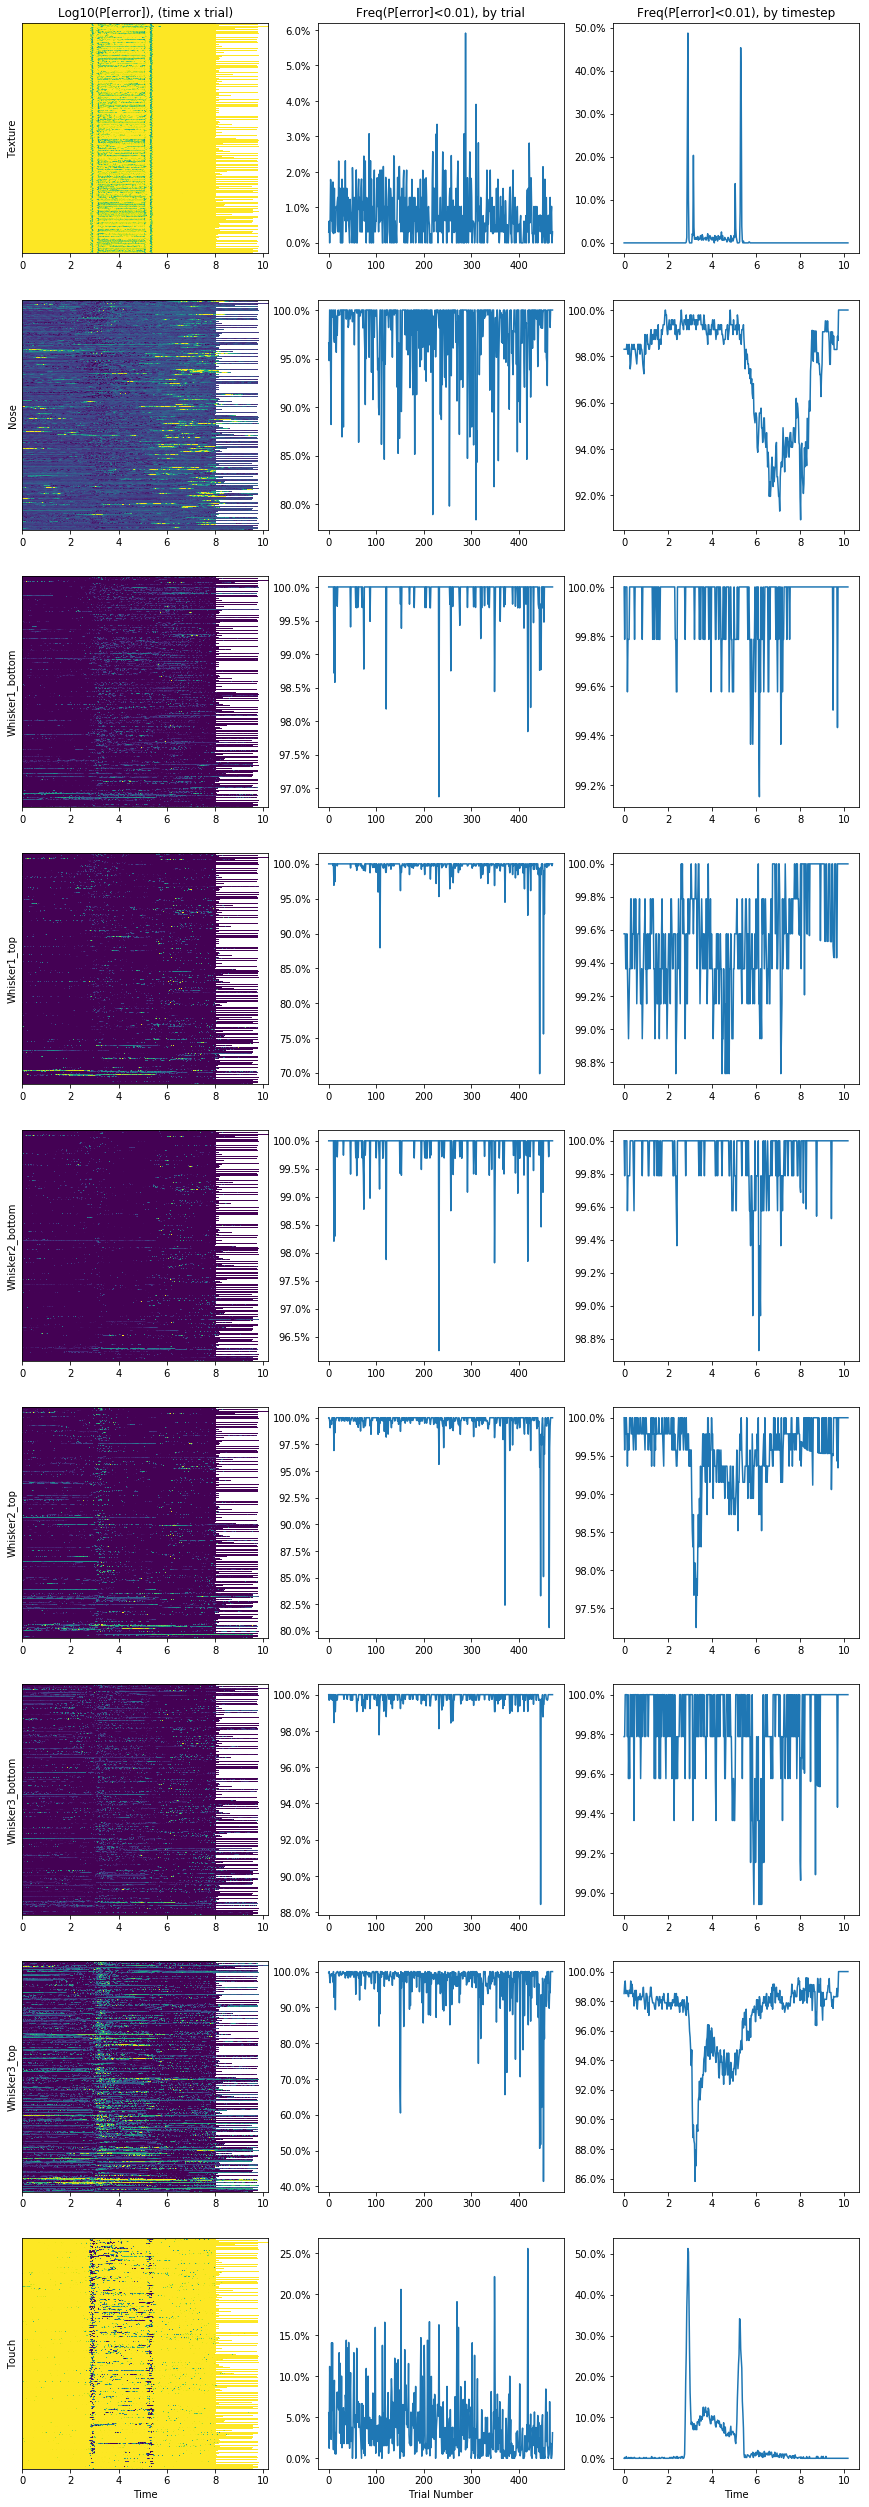

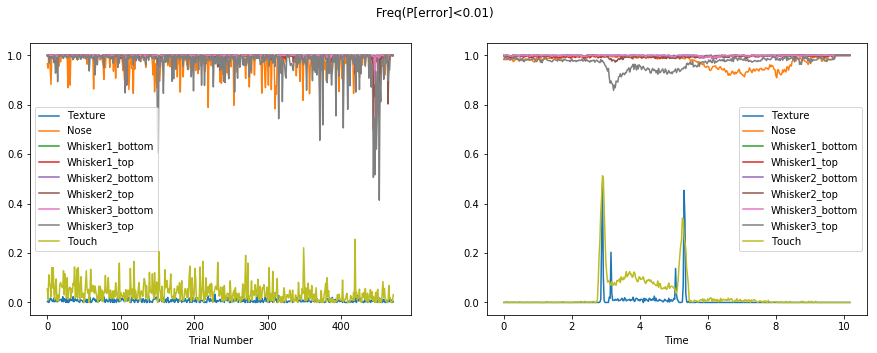

In [20]:
SP.display_quality_control(pThr=0.01)

## First Touch

**TODO**:
<font color='red' size='3'>
 <ul>
  <li>Decide if P=0.01 is a good measure of confidence for first touch</li>
  <li>Decide if first occurence of confident touch is an adequate measure of the first touch</li>
</ul> 
</font>

In [ ]:
SP.display_first_touch(pThr=0.01)

## Stickman

In [21]:
#nodeIdxs = None
nodeIdxs = np.array([0,1,2,3,4,5, 8])

for i in range(SP.nTrials):
    SP.write_stickman(trialIdx=i, showSummary=False, nodeIdxs=nodeIdxs)

(324, 7) (323, 7)
Skipping edge constraint as no edges provided
bool bool
(324, 7) (324, 7)
Not Found file 2017_12_18_12_39_56.avi
Found file 2017_12_18_12_39_56.mp4
Writing video [324/324]
Done writing!
Compressing to MP4
Deleting uncompressed
(326, 7) (325, 7)
Skipping edge constraint as no edges provided
bool bool
(326, 7) (326, 7)
Not Found file 2017_12_18_12_40_10.avi
Found file 2017_12_18_12_40_10.mp4
Writing video [326/326]
Done writing!
Compressing to MP4
Deleting uncompressed
(322, 7) (321, 7)
Skipping edge constraint as no edges provided
bool bool
(322, 7) (322, 7)
Not Found file 2017_12_18_12_40_28.avi
Found file 2017_12_18_12_40_28.mp4
Writing video [322/322]
Done writing!
Compressing to MP4
Deleting uncompressed
(320, 7) (319, 7)
Skipping edge constraint as no edges provided
bool bool
(320, 7) (320, 7)
Not Found file 2017_12_18_12_40_41.avi
Found file 2017_12_18_12_40_41.mp4
Writing video [320/320]
Done writing!
Compressing to MP4
Deleting uncompressed
(392, 7) (391, 7)
Sk

Writing video [320/320]
Done writing!
Compressing to MP4
Deleting uncompressed
(320, 7) (319, 7)
Skipping edge constraint as no edges provided
bool bool
(320, 7) (320, 7)
Not Found file 2017_12_18_12_48_15.avi
Found file 2017_12_18_12_48_15.mp4
Writing video [320/320]
Done writing!
Compressing to MP4
Deleting uncompressed
(389, 7) (388, 7)
Skipping edge constraint as no edges provided
bool bool
(389, 7) (389, 7)
Not Found file 2017_12_18_12_48_29.avi
Found file 2017_12_18_12_48_29.mp4
Writing video [389/389]
Done writing!
Compressing to MP4
Deleting uncompressed
(321, 7) (320, 7)
Skipping edge constraint as no edges provided
bool bool
(321, 7) (321, 7)
Not Found file 2017_12_18_12_48_44.avi
Found file 2017_12_18_12_48_44.mp4
Writing video [321/321]
Done writing!
Compressing to MP4
Deleting uncompressed
(320, 7) (319, 7)
Skipping edge constraint as no edges provided
bool bool
(320, 7) (320, 7)
Not Found file 2017_12_18_12_48_57.avi
Found file 2017_12_18_12_48_57.mp4
Writing video [320/3

Writing video [320/320]
Done writing!
Compressing to MP4
Deleting uncompressed
(391, 7) (390, 7)
Skipping edge constraint as no edges provided
bool bool
(391, 7) (391, 7)
Not Found file 2017_12_18_12_56_36.avi
Found file 2017_12_18_12_56_36.mp4
Writing video [391/391]
Done writing!
Compressing to MP4
Deleting uncompressed
(389, 7) (388, 7)
Skipping edge constraint as no edges provided
bool bool
(389, 7) (389, 7)
Not Found file 2017_12_18_12_56_51.avi
Found file 2017_12_18_12_56_51.mp4
Writing video [389/389]
Done writing!
Compressing to MP4
Deleting uncompressed
(330, 7) (329, 7)
Skipping edge constraint as no edges provided
bool bool
(330, 7) (330, 7)
Not Found file 2017_12_18_12_57_06.avi
Found file 2017_12_18_12_57_06.mp4
Writing video [330/330]
Done writing!
Compressing to MP4
Deleting uncompressed
(345, 7) (344, 7)
Skipping edge constraint as no edges provided
bool bool
(345, 7) (345, 7)
Not Found file 2017_12_18_12_57_20.avi
Found file 2017_12_18_12_57_20.mp4
Writing video [345/3

Writing video [325/325]
Done writing!
Compressing to MP4
Deleting uncompressed
(327, 7) (326, 7)
Skipping edge constraint as no edges provided
bool bool
(327, 7) (327, 7)
Not Found file 2017_12_18_13_05_19.avi
Found file 2017_12_18_13_05_19.mp4
Writing video [327/327]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 7) (389, 7)
Skipping edge constraint as no edges provided
bool bool
(390, 7) (390, 7)
Not Found file 2017_12_18_13_05_37.avi
Found file 2017_12_18_13_05_37.mp4
Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(321, 7) (320, 7)
Skipping edge constraint as no edges provided
bool bool
(321, 7) (321, 7)
Not Found file 2017_12_18_13_05_52.avi
Found file 2017_12_18_13_05_52.mp4
Writing video [321/321]
Done writing!
Compressing to MP4
Deleting uncompressed
(320, 7) (319, 7)
Skipping edge constraint as no edges provided
bool bool
(320, 7) (320, 7)
Not Found file 2017_12_18_13_06_06.avi
Found file 2017_12_18_13_06_06.mp4
Writing video [320/3

Writing video [321/321]
Done writing!
Compressing to MP4
Deleting uncompressed
(320, 7) (319, 7)
Skipping edge constraint as no edges provided
bool bool
(320, 7) (320, 7)
Not Found file 2017_12_18_13_14_00.avi
Found file 2017_12_18_13_14_00.mp4
Writing video [320/320]
Done writing!
Compressing to MP4
Deleting uncompressed
(326, 7) (325, 7)
Skipping edge constraint as no edges provided
bool bool
(326, 7) (326, 7)
Not Found file 2017_12_18_13_14_14.avi
Found file 2017_12_18_13_14_14.mp4
Writing video [326/326]
Done writing!
Compressing to MP4
Deleting uncompressed
(389, 7) (388, 7)
Skipping edge constraint as no edges provided
bool bool
(389, 7) (389, 7)
Not Found file 2017_12_18_13_14_32.avi
Found file 2017_12_18_13_14_32.mp4
Writing video [389/389]
Done writing!
Compressing to MP4
Deleting uncompressed
(320, 7) (319, 7)
Skipping edge constraint as no edges provided
bool bool
(320, 7) (320, 7)
Not Found file 2017_12_18_13_14_47.avi
Found file 2017_12_18_13_14_47.mp4
Writing video [320/3

Writing video [320/320]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 7) (389, 7)
Skipping edge constraint as no edges provided
bool bool
(390, 7) (390, 7)
Not Found file 2017_12_18_13_22_57.avi
Found file 2017_12_18_13_22_57.mp4
Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(325, 7) (324, 7)
Skipping edge constraint as no edges provided
bool bool
(325, 7) (325, 7)
Not Found file 2017_12_18_13_23_12.avi
Found file 2017_12_18_13_23_12.mp4
Writing video [325/325]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 7) (389, 7)
Skipping edge constraint as no edges provided
bool bool
(390, 7) (390, 7)
Not Found file 2017_12_18_13_23_30.avi
Found file 2017_12_18_13_23_30.mp4
Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(320, 7) (319, 7)
Skipping edge constraint as no edges provided
bool bool
(320, 7) (320, 7)
Not Found file 2017_12_18_13_23_45.avi
Found file 2017_12_18_13_23_45.mp4
Writing video [320/3

Writing video [325/325]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 7) (389, 7)
Skipping edge constraint as no edges provided
bool bool
(390, 7) (390, 7)
Not Found file 2017_12_18_13_31_30.avi
Found file 2017_12_18_13_31_30.mp4
Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(327, 7) (326, 7)
Skipping edge constraint as no edges provided
bool bool
(327, 7) (327, 7)
Not Found file 2017_12_18_13_31_45.avi
Found file 2017_12_18_13_31_45.mp4
Writing video [327/327]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 7) (389, 7)
Skipping edge constraint as no edges provided
bool bool
(390, 7) (390, 7)
Not Found file 2017_12_18_13_32_03.avi
Found file 2017_12_18_13_32_03.mp4
Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(323, 7) (322, 7)
Skipping edge constraint as no edges provided
bool bool
(323, 7) (323, 7)
Not Found file 2017_12_18_13_32_19.avi
Found file 2017_12_18_13_32_19.mp4
Writing video [323/3

Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(354, 7) (353, 7)
Skipping edge constraint as no edges provided
bool bool
(354, 7) (354, 7)
Not Found file 2017_12_18_13_39_45.avi
Found file 2017_12_18_13_39_45.mp4
Writing video [354/354]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 7) (389, 7)
Skipping edge constraint as no edges provided
bool bool
(390, 7) (390, 7)
Not Found file 2017_12_18_13_39_59.avi
Found file 2017_12_18_13_39_59.mp4
Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 7) (389, 7)
Skipping edge constraint as no edges provided
bool bool
(390, 7) (390, 7)
Not Found file 2017_12_18_13_40_14.avi
Found file 2017_12_18_13_40_14.mp4
Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(320, 7) (319, 7)
Skipping edge constraint as no edges provided
bool bool
(320, 7) (320, 7)
Not Found file 2017_12_18_13_40_29.avi
Found file 2017_12_18_13_40_29.mp4
Writing video [320/3

Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 7) (389, 7)
Skipping edge constraint as no edges provided
bool bool
(390, 7) (390, 7)
Not Found file 2017_12_18_13_48_08.avi
Found file 2017_12_18_13_48_08.mp4
Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(320, 7) (319, 7)
Skipping edge constraint as no edges provided
bool bool
(320, 7) (320, 7)
Not Found file 2017_12_18_13_48_23.avi
Found file 2017_12_18_13_48_23.mp4
Writing video [320/320]
Done writing!
Compressing to MP4
Deleting uncompressed
(331, 7) (330, 7)
Skipping edge constraint as no edges provided
bool bool
(331, 7) (331, 7)
Not Found file 2017_12_18_13_48_36.avi
Found file 2017_12_18_13_48_36.mp4
Writing video [331/331]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 7) (389, 7)
Skipping edge constraint as no edges provided
bool bool
(390, 7) (390, 7)
Not Found file 2017_12_18_13_48_54.avi
Found file 2017_12_18_13_48_54.mp4
Writing video [390/3

Writing video [338/338]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 7) (389, 7)
Skipping edge constraint as no edges provided
bool bool
(390, 7) (390, 7)
Not Found file 2017_12_18_13_56_34.avi
Found file 2017_12_18_13_56_34.mp4
Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(319, 7) (318, 7)
Skipping edge constraint as no edges provided
bool bool
(319, 7) (319, 7)
Not Found file 2017_12_18_13_56_49.avi
Found file 2017_12_18_13_56_49.mp4
Writing video [319/319]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 7) (389, 7)
Skipping edge constraint as no edges provided
bool bool
(390, 7) (390, 7)
Not Found file 2017_12_18_13_57_03.avi
Found file 2017_12_18_13_57_03.mp4
Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(327, 7) (326, 7)
Skipping edge constraint as no edges provided
bool bool
(327, 7) (327, 7)
Not Found file 2017_12_18_13_57_18.avi
Found file 2017_12_18_13_57_18.mp4
Writing video [327/3

Writing video [339/339]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 7) (389, 7)
Skipping edge constraint as no edges provided
bool bool
(390, 7) (390, 7)
Not Found file 2017_12_18_14_05_08.avi
Found file 2017_12_18_14_05_08.mp4
Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(381, 7) (380, 7)
Skipping edge constraint as no edges provided
bool bool
(381, 7) (381, 7)
Not Found file 2017_12_18_14_05_23.avi
Found file 2017_12_18_14_05_23.mp4
Writing video [381/381]
Done writing!
Compressing to MP4
Deleting uncompressed
(320, 7) (319, 7)
Skipping edge constraint as no edges provided
bool bool
(320, 7) (320, 7)
Not Found file 2017_12_18_14_05_38.avi
Found file 2017_12_18_14_05_38.mp4
Writing video [320/320]
Done writing!
Compressing to MP4
Deleting uncompressed
(391, 7) (390, 7)
Skipping edge constraint as no edges provided
bool bool
(391, 7) (391, 7)
Not Found file 2017_12_18_14_05_51.avi
Found file 2017_12_18_14_05_51.mp4
Writing video [391/3

Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(333, 7) (332, 7)
Skipping edge constraint as no edges provided
bool bool
(333, 7) (333, 7)
Not Found file 2017_12_18_14_13_27.avi
Found file 2017_12_18_14_13_27.mp4
Writing video [333/333]
Done writing!
Compressing to MP4
Deleting uncompressed
(380, 7) (379, 7)
Skipping edge constraint as no edges provided
bool bool
(380, 7) (380, 7)
Not Found file 2017_12_18_14_13_40.avi
Found file 2017_12_18_14_13_40.mp4
Writing video [380/380]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 7) (389, 7)
Skipping edge constraint as no edges provided
bool bool
(390, 7) (390, 7)
Not Found file 2017_12_18_14_13_55.avi
Found file 2017_12_18_14_13_55.mp4
Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(320, 7) (319, 7)
Skipping edge constraint as no edges provided
bool bool
(320, 7) (320, 7)
Not Found file 2017_12_18_14_14_10.avi
Found file 2017_12_18_14_14_10.mp4
Writing video [320/3

Writing video [381/381]
Done writing!
Compressing to MP4
Deleting uncompressed
(381, 7) (380, 7)
Skipping edge constraint as no edges provided
bool bool
(381, 7) (381, 7)
Not Found file 2017_12_18_14_21_47.avi
Found file 2017_12_18_14_21_47.mp4
Writing video [381/381]
Done writing!
Compressing to MP4
Deleting uncompressed
(380, 7) (379, 7)
Skipping edge constraint as no edges provided
bool bool
(380, 7) (380, 7)
Not Found file 2017_12_18_14_22_02.avi
Found file 2017_12_18_14_22_02.mp4
Writing video [380/380]
Done writing!
Compressing to MP4
Deleting uncompressed
(382, 7) (381, 7)
Skipping edge constraint as no edges provided
bool bool
(382, 7) (382, 7)
Not Found file 2017_12_18_14_22_16.avi
Found file 2017_12_18_14_22_16.mp4
Writing video [382/382]
Done writing!
Compressing to MP4
Deleting uncompressed
(326, 7) (325, 7)
Skipping edge constraint as no edges provided
bool bool
(326, 7) (326, 7)
Not Found file 2017_12_18_14_22_31.avi
Found file 2017_12_18_14_22_31.mp4
Writing video [326/3

Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(320, 7) (319, 7)
Skipping edge constraint as no edges provided
bool bool
(320, 7) (320, 7)
Not Found file 2017_12_18_14_30_12.avi
Found file 2017_12_18_14_30_12.mp4
Writing video [320/320]
Done writing!
Compressing to MP4
Deleting uncompressed
(390, 7) (389, 7)
Skipping edge constraint as no edges provided
bool bool
(390, 7) (390, 7)
Not Found file 2017_12_18_14_30_26.avi
Found file 2017_12_18_14_30_26.mp4
Writing video [390/390]
Done writing!
Compressing to MP4
Deleting uncompressed
(322, 7) (321, 7)
Skipping edge constraint as no edges provided
bool bool
(322, 7) (322, 7)
Not Found file 2017_12_18_14_30_41.avi
Found file 2017_12_18_14_30_41.mp4
Writing video [322/322]
Done writing!
Compressing to MP4
Deleting uncompressed
(381, 7) (380, 7)
Skipping edge constraint as no edges provided
bool bool
(381, 7) (381, 7)
Not Found file 2017_12_18_14_30_54.avi
Found file 2017_12_18_14_30_54.mp4
Writing video [381/3

682